In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving calendar_year_revenue.csv to calendar_year_revenue.csv


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded['calendar_year_revenue.csv']))
df
df.head()

,Calendar Year,Land Class,Land Category,State,County,FIPS Code,Offshore Region,Revenue Type,Mineral Lease Type,Commodity,Product,Revenue
0,2003,Federal,Onshore,Pennsylvania,Armstrong,42005.0,NaN,Royalties,Oil & Gas,Gas,Unprocessed (Wet) Gas,341.47
1,2003,Federal,Onshore,Louisiana,Natchitoches,22069.0,NaN,Other revenues,Oil & Gas,Oil & gas (pre-production),NaN,331.30
2,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Copper,Copper Concentrate,57929.02
3,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Rents,Hardrock,Hardrock,NaN,-51533.57
4,2003,Federal,Onshore,Missouri,Iron,29093.0,NaN,Royalties,Hardrock,Hardrock,Copper Concentrate,14834.41


In [4]:
print(df.head())       # Display the first few rows
print(df.info())       # Get a summary of the DataFrame
print(df.describe())    # Get descriptive statistics


   Calendar Year Land Class Land Category         State        County  \
0           2003    Federal       Onshore  Pennsylvania     Armstrong   
1           2003    Federal       Onshore     Louisiana  Natchitoches   
2           2003    Federal       Onshore      Missouri          Iron   
3           2003    Federal       Onshore      Missouri          Iron   
4           2003    Federal       Onshore      Missouri          Iron   

   FIPS Code Offshore Region    Revenue Type Mineral Lease Type  \
0    42005.0             NaN       Royalties          Oil & Gas   
1    22069.0             NaN  Other revenues          Oil & Gas   
2    29093.0             NaN       Royalties           Hardrock   
3    29093.0             NaN           Rents           Hardrock   
4    29093.0             NaN       Royalties           Hardrock   

                    Commodity                Product   Revenue  
0                         Gas  Unprocessed (Wet) Gas    341.47  
1  Oil & gas (pre-production

In [5]:
print(df.isnull().sum())

Calendar Year             0
Land Class                0
Land Category             0
State                  1955
County                 1955
FIPS Code              1955
Offshore Region       47480
Revenue Type              0
Mineral Lease Type       87
Commodity                 0
Product               22159
Revenue                   0
dtype: int64


In [6]:
df = df.dropna(subset=['Revenue'])

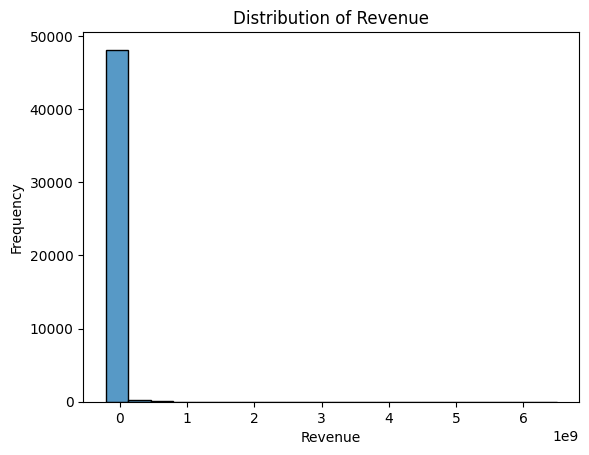

In [21]:
sns.histplot(data=df, x='Revenue', bins=20)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Revenue')
plt.show()

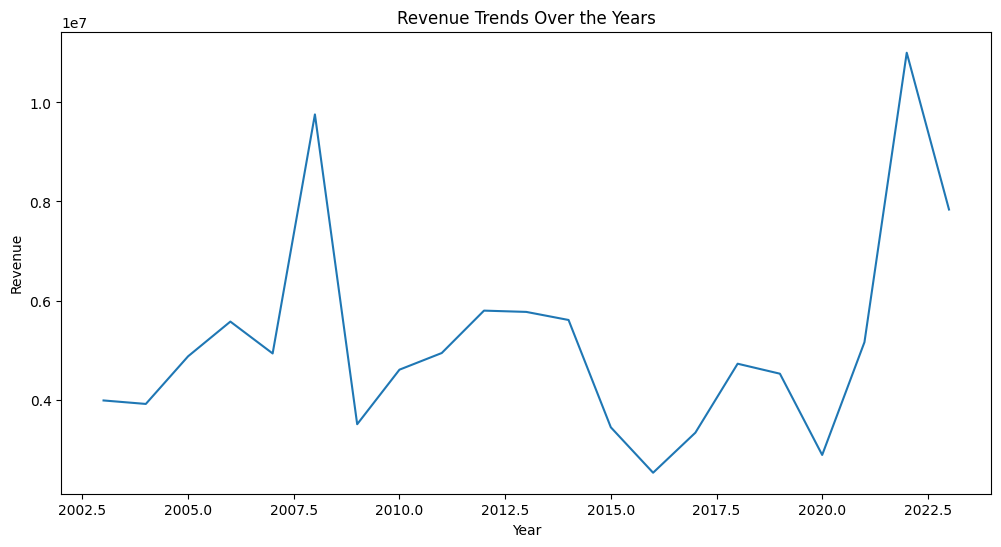

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Calendar Year', y='Revenue', ci=None)
plt.title('Revenue Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

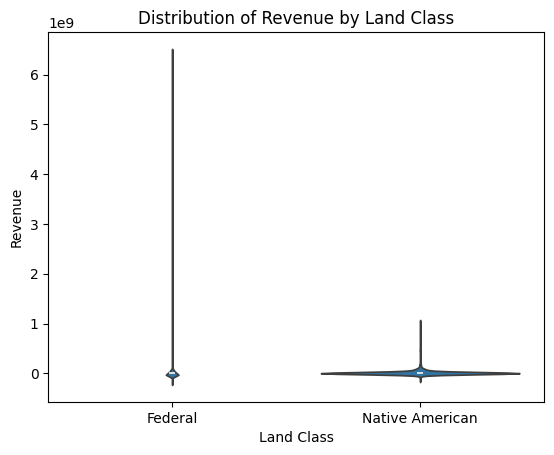

In [22]:
sns.violinplot(data=df, x='Land Class', y='Revenue')
plt.title('Distribution of Revenue by Land Class')
plt.xlabel('Land Class')
plt.ylabel('Revenue')
plt.show()

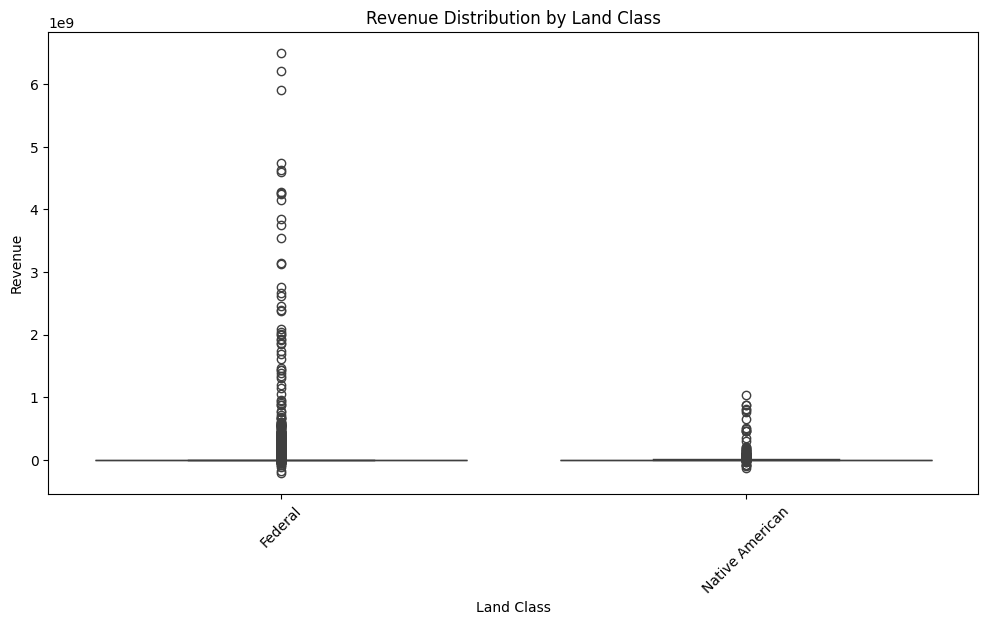

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Land Class', y='Revenue')
plt.title('Revenue Distribution by Land Class')
plt.xticks(rotation=45)
plt.show()

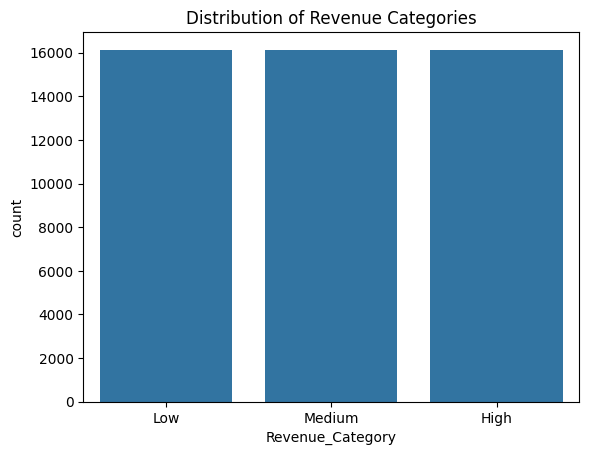

In [23]:
sns.countplot(data=df, x='Revenue_Category')
plt.title('Distribution of Revenue Categories')
plt.show()

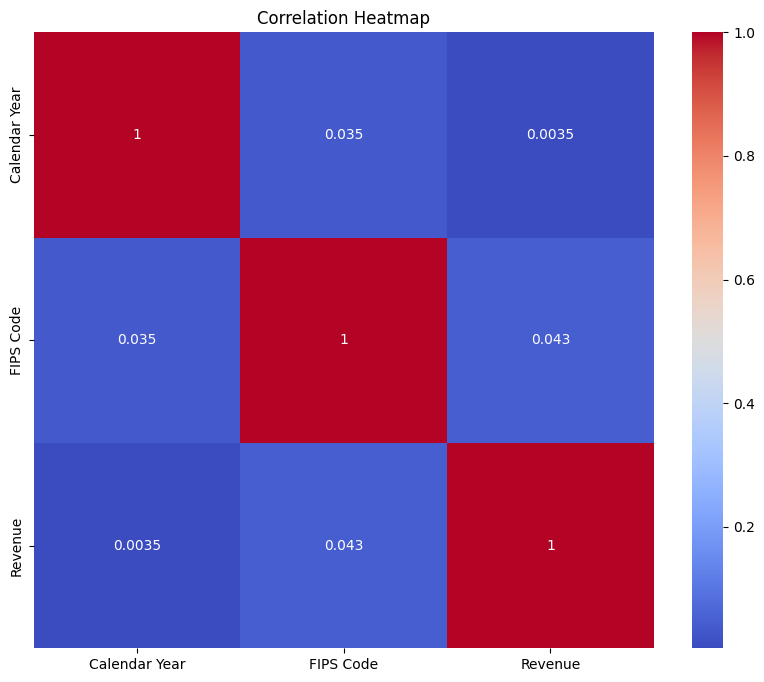

In [9]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
features = numeric_df.drop(columns=['Revenue'])
target = numeric_df['Revenue']

# Handling missing values by filling with mean
features = features.fillna(features.mean())
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

(1.0416622357867372e+16, 7.411573418436568e-06)

In [11]:
df['Revenue_Category'] = pd.qcut(df['Revenue'], 3, labels=['Low', 'Medium', 'High'])

In [12]:
from sklearn.model_selection import train_test_split

features = numeric_df.drop(columns=['Revenue'])
target = df['Revenue_Category']  # Use the new categorical target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer  # Import SimpleImputer for handling missing values
from sklearn.metrics import accuracy_score

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy

0.3684808427140349

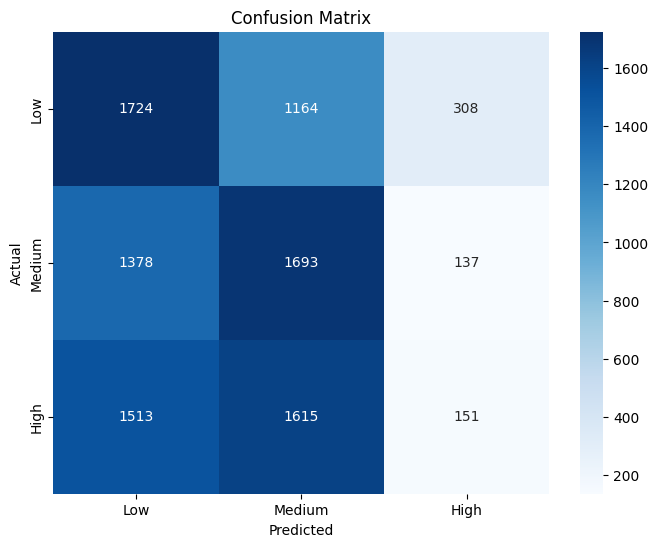

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()